In [20]:
# Importing the Packages

import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from keplergl import KeplerGl
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Reading the Data

pedons_df = pd.read_csv('data\RaCA_SOC_pedons.csv')

In [3]:
# Making the List of Columns to Understand the Unique Identifier for both the datasets (Will be helpful for merging as well)
# Notes has been made

identifiers_pedons = ['upedonid', 'rcasiteid', 'upedon']

In [4]:
pedons_df.loc[pedons_df['upedon'] == 'C0101F011'][identifiers_pedons]

,upedonid,rcasiteid,upedon
43,C0101F01-1,C0101F01,C0101F011


* `upedon` - Unique RaCA pedon ID contains the site and pedon within the site
* `upedonid` - This column has lots of typos, sometimes a hyphen '-' is used sometimes an underscore '_' 
* `rcasiteid` - This column is needed for the Mapping with the General Location Data

In [5]:
pedons_df.drop(columns = ['upedonid'], inplace=True)

upedonid	link to User Pedon ID\
MO	Region\
MOGr	Soil Group\
LU	LU/LC class\
MOGrLU	Group and LULC class\
rcasiteid	individual RaCA site\
upedon	unique RaCA pedon ID - contains site and pedon within site\
SOCstock5	stock summed to 5 cm by fixed depth\
SOCstock30	stock summed to 30 cm by fixed depth\
SOCstock100	stock summed to 100 cm by fixed depth\
Sample_count	total no of samples\
total_thickness	max bottom depth of pedon\
SOC_count	no of samples (for this pedon) with SOC\
Lab_count	no of samples (for this pedon) with a KSSL ID\
Depth_to_R	depth to R or Cr horizon\
Non-R_SampleCount	Number of samples not including R or Cr's\
SOC_thickness	Max bottom depth with SOC measured\
USE	assigns the max depth this pedon should be used for\


## Studying Pedons Dataset (Taking only the Columns to be focused on)

In [6]:
pedons_columns_needed = ['upedon', 'rcasiteid','SOCstock5','SOCstock30', 'SOCstock100']
pedons_df = pedons_df[pedons_columns_needed]

In [7]:
pedons_df.head()

,upedon,rcasiteid,SOCstock5,SOCstock30,SOCstock100
0,A0108P921,A0108P92,15.126360,76.022073,100.113941
1,A0116P901,A0116P90,35.481720,95.965557,242.002573
2,A0116P941,A0116P94,36.827055,104.147733,293.079581
3,A0116X971,A0116X97,6.950620,29.854781,69.735244
4,A0120R931,A0120R93,13.072982,53.249971,116.996856


In [8]:
print(pedons_df['upedon'].nunique() == len(pedons_df))
print(pedons_df['rcasiteid'].nunique() == len(pedons_df))

True
True


In [40]:
pedons_df.loc[:,'Land_Use'].value_counts()

Forestland     1718
Rangeland      1264
Cropland       1242
Pastureland    1061
Wetland         614
CRP             337
Name: Land_Use, dtype: int64

**`Conclusion:`** - There are no duplicate records

['ForestLand', 'RangeLand', 'CropLand', 'PastureLand', 'Wetland', 'CRP']


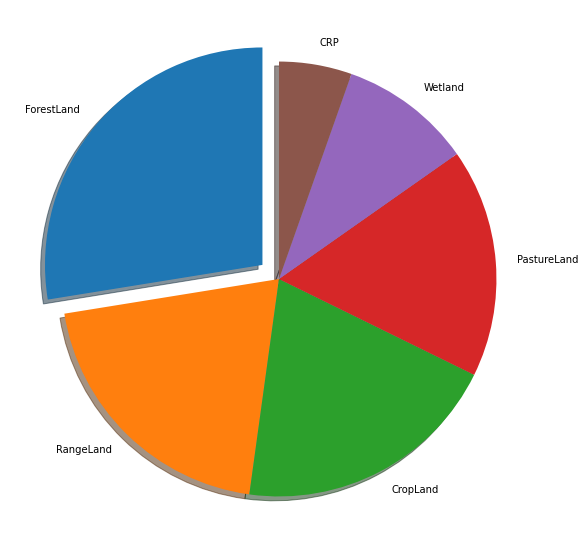

In [43]:
# Fetching the Land Use from the RaCA Side Id from upedon column and storing in a new column
# Taking the Land Use from the upedon column to ensure correct Land Use.
pedons_df.loc[:,'Land_Use'] = pedons_df['upedon'].apply(lambda x : x[5])

# Creating a dictionary to decode the Letter for the Land Use
land_use_dict = dict(C='Cropland', F='Forestland', P='Pastureland', R='Rangeland', W='Wetland', X='CRP')

# Replacing the LandUse with the Letters. 
pedons_df.replace({'Land_Use' : land_use_dict}, inplace=True)

fig, ax = plt.subplots(figsize=(10,10))
#Plotting the Land Use
#pedons_df.loc[:,'Land_Use'].value_counts().sort_values().plot(kind = 'pie', ax=ax, label=True)
labels = ['ForestLand', 'RangeLand', 'CropLand', 'PastureLand', 'Wetland', 'CRP']
explode = (0.1, 0, 0, 0, 0, 0)
print(labels)
plt.pie(pedons_df.loc[:,'Land_Use'].value_counts(), labels=labels, shadow=True, startangle=90, explode=explode)
plt.show()

#### **`Conclusion:`** Based on the plot, we can say Forestlands had the most data

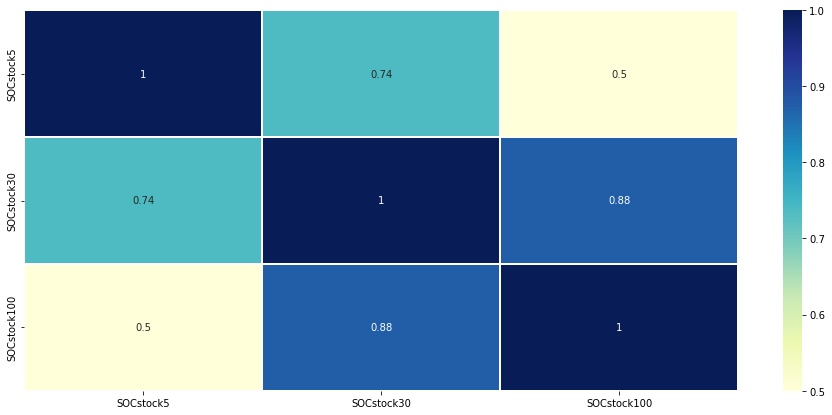

In [10]:
plt.figure(figsize=(16,7))
sns.heatmap(pedons_df.corr(), annot=True, linewidths = 0.1, cmap="YlGnBu")
plt.show()

#### **`Conclusion:`** SOCstock100 and SOCstock30 are highly co-related to each other

In [11]:
pedons_df.head()

,upedon,rcasiteid,SOCstock5,SOCstock30,SOCstock100,Land_Use
0,A0108P921,A0108P92,15.126360,76.022073,100.113941,Pastureland
1,A0116P901,A0116P90,35.481720,95.965557,242.002573,Pastureland
2,A0116P941,A0116P94,36.827055,104.147733,293.079581,Pastureland
3,A0116X971,A0116X97,6.950620,29.854781,69.735244,CRP
4,A0120R931,A0120R93,13.072982,53.249971,116.996856,Rangeland


In [12]:
grouped = pedons_df.groupby(by='Land_Use')

In [13]:
def mean_print(key, groups):
    print('For Land which is used for - {}'.format(key))
    print('\t The SOCstock5 mean is : {}'.format(groups['SOCstock5'].mean()))
    print('\t The SOCstock30 mean is : {}'.format(groups['SOCstock30'].mean()))
    print('\t The SOCstock100 mean is : {}'.format(groups['SOCstock100'].mean()))

In [14]:
type_land = []
SOC5 = []
SOC30 = []
SOC100 = []

In [15]:
def append_list(key,groups):
    type_land.append(key)
    SOC5.append(groups['SOCstock5'].mean())
    SOC30.append(groups['SOCstock30'].mean())
    SOC100.append(groups['SOCstock100'].mean())

In [16]:
for key, groups in grouped:
    mean_print(key,groups)
    append_list(key,groups)

For Land which is used for - CRP
	 The SOCstock5 mean is : 17.94755321132738
	 The SOCstock30 mean is : 54.70398204558004
	 The SOCstock100 mean is : 91.50707602729554
For Land which is used for - Cropland
	 The SOCstock5 mean is : 14.199687191123312
	 The SOCstock30 mean is : 70.41648119942978
	 The SOCstock100 mean is : 146.5111648078408
For Land which is used for - Forestland
	 The SOCstock5 mean is : 53.15433028072902
	 The SOCstock30 mean is : 128.6456394784585
	 The SOCstock100 mean is : 207.9934057952518
For Land which is used for - Pastureland
	 The SOCstock5 mean is : 21.42079596578424
	 The SOCstock30 mean is : 73.62087646883595
	 The SOCstock100 mean is : 147.79318357660844
For Land which is used for - Rangeland
	 The SOCstock5 mean is : 12.570540478231836
	 The SOCstock30 mean is : 42.790839063136815
	 The SOCstock100 mean is : 78.07248038288012
For Land which is used for - Wetland
	 The SOCstock5 mean is : 52.3758312897122
	 The SOCstock30 mean is : 222.9716938365186
	 The

In [17]:
df_temp = pd.DataFrame({'SOC5': SOC5,
                   'SOC30': SOC30,
                   'SOC100': SOC100}, index=type_land)

<AxesSubplot:>

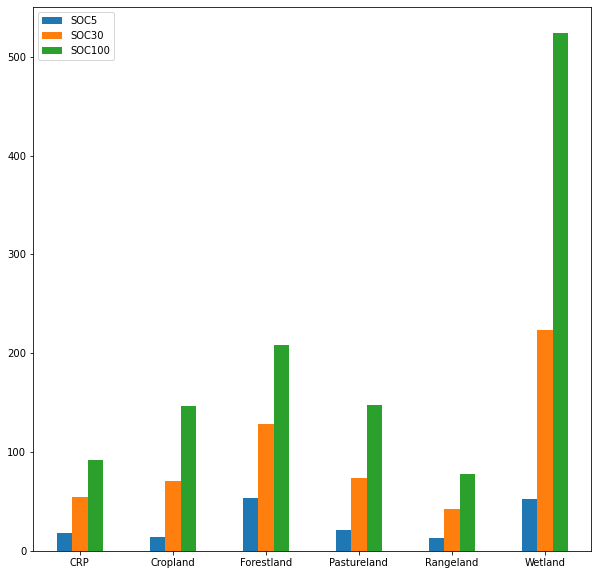

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
df_temp.plot(ax=ax, kind='bar', rot=0)

#### **`Conclusion`** - Wetland has the most (mean) Soil Organic Compound at 100cms depth, and Rangeland has the least. 

In [19]:
pedons_df.to_csv('processed_data\pedons_processed.csv', index=None)